In [157]:
#!pip install gdown

In [158]:
#!gdown https://drive.google.com/u/1/uc?id=1Uo6-h0HViUVVp65TssLsYP8-79MllYdN --output CAI2.tar.gz

In [159]:
#!tar -xvzf CAI2.tar.gz

In [160]:
#!gdown https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp --output caltech101.tar.gz

In [161]:
#!ls caltech101.tar.gz


In [162]:
#!tar -xvzf caltech101.tar.gz


In [163]:
#!mv CAI2 datasets/cai2

In [217]:
#!rm -rf datasets/caltech101/BACKGROUND_Google

In [218]:
!pip install tensorflow

In [219]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import random
import time
import math
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D

In [226]:
def model_picker(name):
    if (name == 'vgg16'):
        model = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3),
                      pooling='max')
    elif (name == 'vgg19'):
        model = VGG19(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3),
                      pooling='max')
    elif (name == 'mobilenet'):
        model = MobileNet(weights='imagenet',
                          include_top=False,
                          input_shape=(224, 224, 3),
                          pooling='max',
                          depth_multiplier=1,
                          alpha=1)
    elif (name == 'inception'):
        model = InceptionV3(weights='imagenet',
                            include_top=False,
                            input_shape=(224, 224, 3),
                            pooling='max')
    elif (name == 'resnet'):
        model = ResNet50(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3),
                        pooling='max')
    elif (name == 'xception'):
        model = Xception(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3),
                         pooling='max')
    else:
        print("Specified model not available")
    return model

In [227]:
model_architecture = 'resnet'
model = model_picker(model_architecture)

In [228]:
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path,
                         target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [229]:
features = extract_features('datasets/caltech101/laptop/image_0033.jpg', model)
print(len(features))

2048


In [230]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_list(root_dir):
    file_list = []
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
    return file_list

In [231]:
#batch_size = 128
#datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

#generator = datagen.flow_from_directory(root_dir,
                                        #target_size=(224, 224),
                                        #class_mode=None,
                                        #shuffle=False)

#num_images = len(generator.filenames)
#num_epochs = int(math.ceil(num_images / batch_size))

#start_time = time.time()
#feature_list = []
#feature_list = model.predict_generator(generator, num_epochs)
#end_time = time.time()

In [233]:
#for i, features in enumerate(feature_list):
    #feature_list[i] = features / norm(features)

#feature_list = feature_list.reshape(len(feature_list), -1)

#print("Num images   = ", len(generator.classes))
#print("Shape of feature_list = ", feature_list.shape)
#print("Time taken in sec = ", end_time - start_time)

In [234]:
# path to the your datasets
#root_dir = 'datasets/cai2'
#filenames = sorted(get_file_list(root_dir))

#feature_list = []
#for i in tqdm_notebook(range(len(filenames))):
    #try:
        #feature_list.append(extract_features(filenames[i], model))
    #except Exception as e:
        #print(f"Error{e} occurs when processing file {filenames[i]}") 

In [253]:
#MAINMODELBUILDING
#insert labels
training_img_labels = ["เครื่องจำหน่ายเครื่องดื่มเย็น", 
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "เครื่องจำหน่ายเครื่องดื่มเย็น",
                       "EDC", 
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC",
                        "EDC", 
                       "EDC",
                        "EDC",
                        "EDC", 
                       "EDC",
                        "EDC",
                       "เครื่องผลิตน้ำแข็ง", 
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",
                      "เครื่องผลิตน้ำแข็ง",]

#link file directory (hard code)
filenames = ["datasets/cai2/cold drink freezer/20211124_114324(0).jpg",
            "datasets/cai2/cold drink freezer/20211124_114324(0).jpg",
             "datasets/cai2/cold drink freezer/20211124_114326(0).jpg",
             "datasets/cai2/cold drink freezer/20211124_114327(0).jpg",
             "datasets/cai2/cold drink freezer/20211124_114328.jpg",
            "datasets/cai2/cold drink freezer/20211124_114330(0).jpg",
            "datasets/cai2/cold drink freezer/20211124_114331.jpg",
            "datasets/cai2/cold drink freezer/20211124_114332.jpg",
            "datasets/cai2/cold drink freezer/20211124_114334.jpg",
            "datasets/cai2/cold drink freezer/20211124_114335.jpg",
            "datasets/cai2/cold drink freezer/20211124_114336.jpg",
            "datasets/cai2/cold drink freezer/20211124_114338.jpg",
            "datasets/cai2/cold drink freezer/20211124_114340(0).jpg",
            "datasets/cai2/cold drink freezer/20211124_114341(0).jpg",
            "datasets/cai2/cold drink freezer/20211124_114342.jpg",
            "datasets/cai2/cold drink freezer/20211124_114345(0).jpg",
            "datasets/cai2/cold drink freezer/20211124_114347(0).jpg",
            "datasets/cai2/EDC/20211210_123243_001 - Copy.jpg",
             "datasets/cai2/EDC/20211210_123243_004.jpg",
             "datasets/cai2/EDC/20211210_123243_007.jpg",
             "datasets/cai2/EDC/20211210_123243_011.jpg",
             "datasets/cai2/EDC/20211210_123243_012.jpg",
             "datasets/cai2/EDC/20211210_123243_013.jpg",
             "datasets/cai2/EDC/20211210_123243_014.jpg",
             "datasets/cai2/EDC/20211210_123243_015.jpg",
             "datasets/cai2/EDC/20211210_123243_016.jpg",
             "datasets/cai2/EDC/20211210_123243_017.jpg",
             "datasets/cai2/EDC/20211210_123243_018.jpg",
             "datasets/cai2/EDC/20211210_123243_019.jpg",
             "datasets/cai2/EDC/20211210_123243_020.jpg",
             "datasets/cai2/EDC/20211210_123243_030.jpg",
             "datasets/cai2/EDC/20211210_123243_024.jpg",
             "datasets/cai2/EDC/20211210_123243_025.jpg",
             "datasets/cai2/EDC/20211210_123243_023.jpg",
             "datasets/cai2/EDC/20211210_123243_022.jpg",
             "datasets/cai2/EDC/20211210_123243_027.jpg",
             "datasets/cai2/EDC/20211210_123243_021.jpg",
             "datasets/cai2/EDC/20211210_123243_003.jpg",
             "datasets/cai2/EDC/20211210_123243_002.jpg",
             "datasets/cai2/EDC/20211210_123243_009.jpg",
             "datasets/cai2/ice maker/IMG_25641210_122731_Burst01.jpg",
             "datasets/cai2/ice maker/IMG_25641210_122740_Burst01.jpg",
             "datasets/cai2/ice maker/IMG_25641210_122823_Burst07.jpg",
             "datasets/cai2/ice maker/IMG_25641210_122823_Burst12.jpg",
             "datasets/cai2/ice maker/IMG_25641210_122823_Burst15.jpg",
             "datasets/cai2/ice maker/IMG_25641210_122823_Burst17.jpg",
             "datasets/cai2/ice maker/IMG_25641210_122823_Burst19.jpg",
             "datasets/cai2/ice maker/IMG_25641210_122936_Burst02.jpg",
             "datasets/cai2/ice maker/IMG_25641210_122936_Burst05.jpg",
             "datasets/cai2/ice maker/IMG_25641210_122936_Burst08.jpg",
             "datasets/cai2/ice maker/IMG_25641210_122936_Burst08.jpg",
             "datasets/cai2/ice maker/IMG_25641210_123026_Burst02.jpg",
             "datasets/cai2/ice maker/IMG_25641210_123026_Burst03.jpg",
             "datasets/cai2/ice maker/IMG_25641210_123026_Burst06.jpg",
             "datasets/cai2/ice maker/IMG_25641210_123026_Burst09.jpg",
             "datasets/cai2/ice maker/IMG_25641210_123026_Burst10.jpg",
             "datasets/cai2/ice maker/IMG_25641210_123026_Burst13.jpg",
             "datasets/cai2/ice maker/IMG_25641210_123026_Burst15.jpg",
             "datasets/cai2/ice maker/IMG_25641210_123026_Burst17.jpg",
             "datasets/cai2/ice maker/IMG_25641210_123026_Burst18.jpg",
             "datasets/cai2/ice maker/IMG_25641210_123026_Burst19.jpg",
            ]





# feature_list = [feature_of_file1.png, ...., feature_of_file3.png]
#feature_list = []
#for i in tqdm_notebook(range(len(filenames))):
    #try:
        #feature_list.append(extract_features(filenames[i], model))
    #except Exception as e:
        #print(f"Error{e} occurs when processing file {filenames[i]}") 

!mkdir pickle
import pickle
pickle.dump(feature_list, open('pickle/features-cai50-resnet.pickle', 'wb'))
pickle.dump(filenames, open('pickle/filenames-cai50.pickle','wb'))
pickle.dump(feature_list, open('pickle/features-cai50-' + model_architecture + '.pickle', 'wb'))
pickle.dump(generator.classes, open('pickle/class_ids-cai50.pickle',  'wb'))

import pickle
filenames = pickle.load(open('pickle/filenames-cai50.pickle', 'rb'))
feature_list = pickle.load(open('pickle/features-cai50-resnet.pickle','rb'))
class_ids = pickle.load(open('pickle/class_ids-cai50.pickle', 'rb'))
                      
#nearest neighbors fitting             
import tensorflow
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)
#add picture directory here                                                
query_image_feature = extract_features('datasets/cai2/cold drink freezer/20211124_114352.jpg' ,model)
distances, indices = neighbors.kneighbors([query_image_feature])

similar_img_labels = [training_img_labels[similar_index] for similar_index in indices[0]]
label_counter = Counter(similar_img_labels)
most_common_labels =  label_counter.most_common(5)
most_common_label_str = [label for label, freq in most_common_labels]

print(f"Possible labels are {most_common_label_str}")

Possible labels are ['เครื่องจำหน่ายเครื่องดื่มเย็น', 'เครื่องผลิตน้ำแข็ง']


In [251]:
#import pickle
#filenames = pickle.load(open('pickle/filenames-cai50.pickle', 'rb'))
#feature_list = pickle.load(open('pickle/features-cai50-resnet.pickle','rb'))
#class_ids = pickle.load(open('pickle/class_ids-cai50.pickle', 'rb'))

In [185]:
import numpy as np
import pickle
from tqdm import tqdm, tqdm_notebook
import random
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import PIL
from PIL import Image
from sklearn.neighbors import NearestNeighbors

import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [186]:
filenames = pickle.load(open('dump/filenames-cai.pickle', 'rb'))
feature_list = pickle.load(open('dump/features-cai-resnet.pickle', 'rb'))
class_ids = pickle.load(open('dump/class_ids-cai.pickle', 'rb'))

In [187]:
num_images = len(filenames)
num_features_per_image = len(feature_list[0])
print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)

Number of images =  1833
Number of features per image =  2048


In [189]:
neighbors = NearestNeighbors(n_neighbors=5,
                             algorithm='brute',
                             metric='euclidean').fit(feature_list)

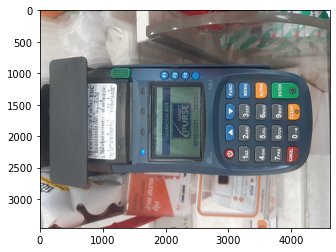

In [190]:
random_index = 63
distances, indices = neighbors.kneighbors([feature_list[random_index]])
plt.imshow(mpimg.imread(filenames[random_index]), interpolation='lanczos')

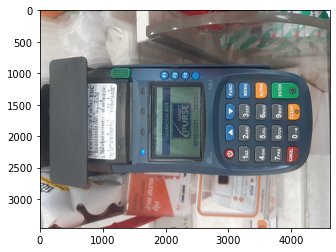

In [191]:
plt.imshow(mpimg.imread(filenames[indices[0][1]]), interpolation='lanczos')

In [192]:
for i in range(5):
    print(distances[0][i])

4.712161e-08
4.712161e-08
0.18271935
0.20908466
0.20908466


In [193]:
# Helper function to get the classname
def classname(str):
    return str.split('/')[-2]


# Helper function to get the classname and filename
def classname_filename(str):
    return str.split('/')[-2] + '/' + str.split('/')[-1]


# Helper functions to plot the nearest images given a query image
def plot_images(filenames, distances):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 10))
    columns = 4
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        if i == 0:
            ax.set_title("Query Image\n" + classname_filename(filenames[i]))
        else:
            ax.set_title("Similar Image\n" + classname_filename(filenames[i]) +
                         "\nDistance: " +
                         str(float("{0:.2f}".format(distances[i]))))
        plt.imshow(image)
        # To save the plot in a high definition format i.e. PDF, uncomment the following line:
        #plt.savefig('results/' + str(random.randint(0,10000))+'.pdf', format='pdf', dpi=1000)
        # We will use this line repeatedly in our code.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor rele

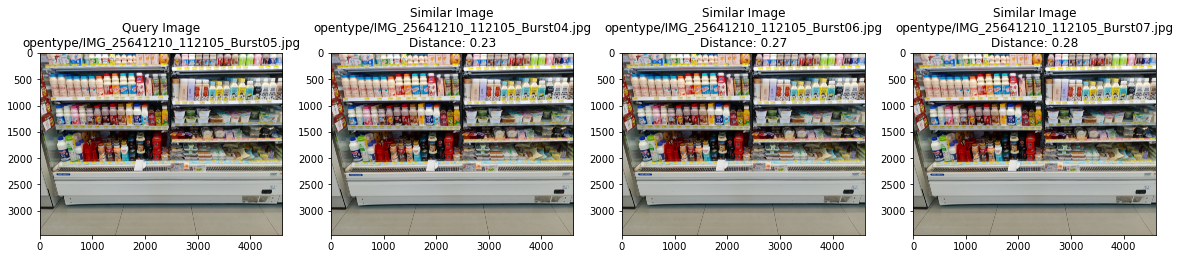

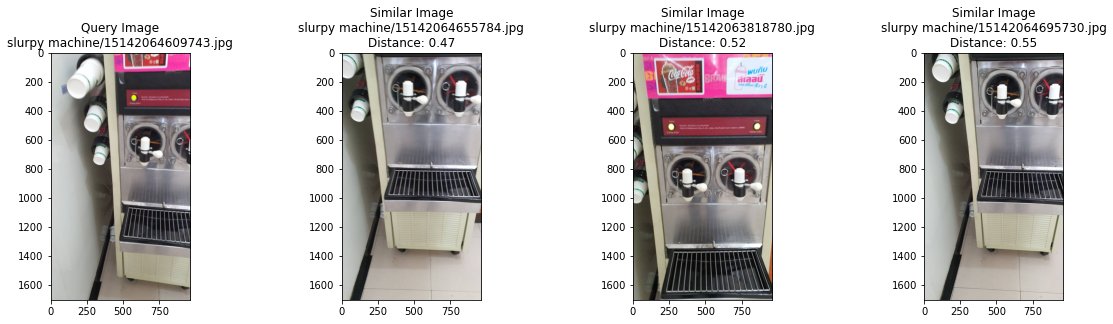

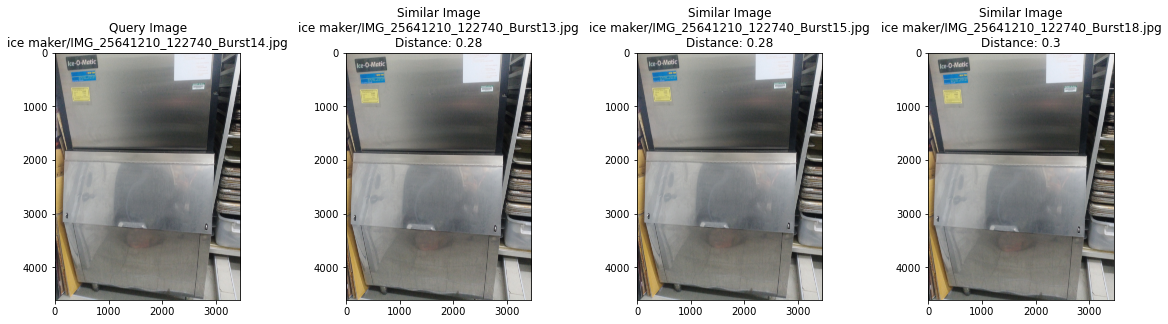

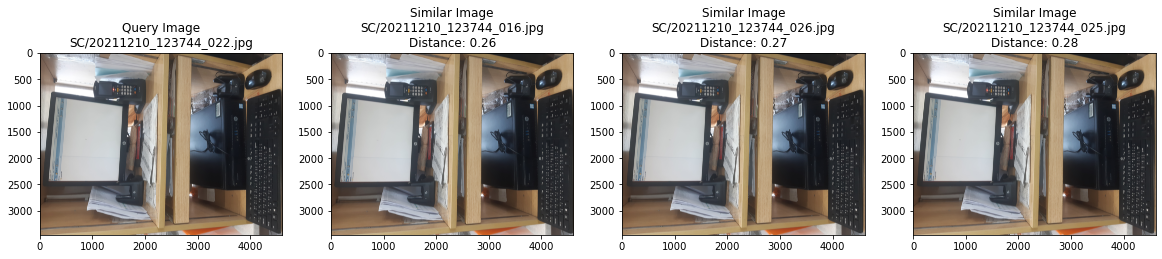

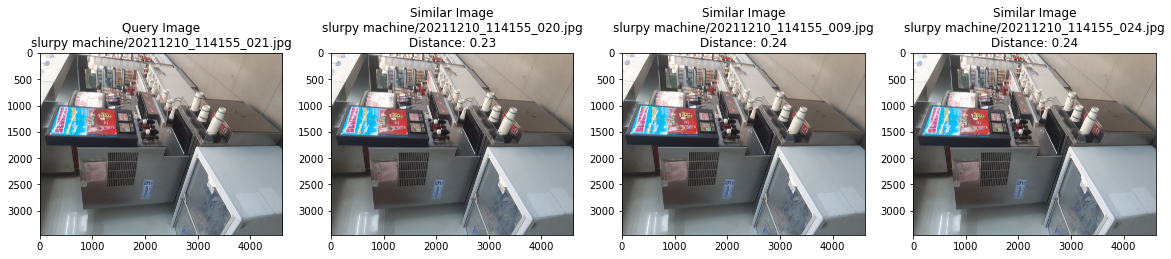

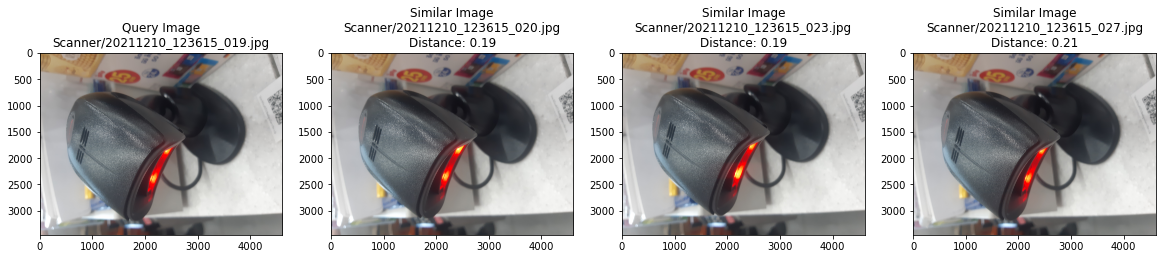

In [200]:
for i in range(6):
    random_image_index = random.randint(0, num_images )
    distances, indices = neighbors.kneighbors([feature_list[random_image_index]])
    # Don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] + \
        [filenames[indices[0][i]] for i in range(1, 4)]
    plot_images(similar_image_paths, distances[0])


In [195]:
neighbors = NearestNeighbors(n_neighbors=len(feature_list),
                             algorithm='brute',
                             metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors(feature_list)

# Calculating some stats
print("Median distance between all photos: ", np.median(distances))
print("Max distance between all photos: ", np.max(distances))
print("Median distance among most similar photos: ",
      np.median(distances[:, 2]))

Median distance between all photos:  0.82266486
Max distance between all photos:  1.1236137
Median distance among most similar photos:  0.25919443


In [199]:
from collections import Counter

# สมมุติว่ามี training image ที่ fit() ไว้ 6 รูป 
# มีอยู่ 
training_img_labels = [
'cold drink freezer',
'EDC',
'ice maker',
'lunch box freezer',
'MICROWAVE',
'opentype',
'POS',
'SC',
'Scanner',
'slurpy machine',
'soft drinks freezer',
'VAULT' ]

query_image_feature = extract_features(QUERY_IMAGE)
distances, indices = neighbors.kneighbors([query_image_feature])

similar_img_labels = [training_img_labels[similar_index] for similar_index in indices[0][i]]
label_counter = Counter(similar_img_labels)
most_common_labels =  label_counter.most_common(5)
most_common_label_str = [label for label, freq in most_common_labels]

print(f"Possible labels are {most_common_label_str}")

NameError: name 'QUERY_IMAGE' is not defined

In [196]:
selected_features = feature_list[:]
selected_filenames = filenames[:]
selected_class_ids = class_ids[:]

In [197]:
from sklearn.manifold import TSNE

# You can play with these values and see how the results change
n_components = 2
verbose = 1
perplexity = 40
n_iter = 1000
metric = 'euclidean'

time_start = time.time()
tsne_results = TSNE(n_components=n_components,
                    verbose=verbose,
                    perplexity=perplexity,
                    n_iter=n_iter,
                    metric=metric).fit_transform(selected_features)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1832 samples in 0.004s...
[t-SNE] Computed neighbors for 1832 samples in 0.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1832
[t-SNE] Computed conditional probabilities for sample 1832 / 1832
[t-SNE] Mean sigma: 0.261925
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.698608
[t-SNE] KL divergence after 1000 iterations: 0.196583
t-SNE done! Time elapsed: 7.46164870262146 seconds


ValueError: 'c' argument has 240 elements, which is inconsistent with 'x' and 'y' with size 1832.

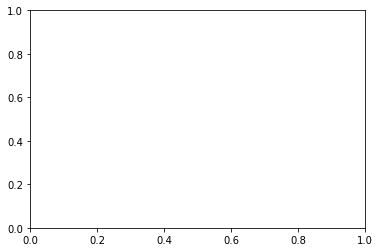

In [198]:
color_map = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:, 0],
                           tsne_results[:, 1],
                           c=selected_class_ids,
                           cmap=color_map)
plt.colorbar(scatter_plot)
plt.show()
# To save the plot in a high definition format i.e. PDF, uncomment the following line:
#plt.savefig('results/' + str(ADD_NAME_HERE)+'.pdf', format='pdf', dpi=1000)

In [99]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [137]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from PIL import Image


def plot_images_in_2d(x, y, image_paths, axis=None, zoom=1):
    if axis is None:
        axis = plt.gca()
    x, y = np.atleast_1d(x, y)
    for x0, y0, image_path in zip(x, y, image_paths):
        image = Image.open(image_path)
        image.thumbnail((100, 100), Image.ANTIALIAS)
        img = OffsetImage(image, zoom=zoom)
        anno_box = AnnotationBbox(img, (x0, y0),
                                  xycoords='data',
                                  frameon=False)
        axis.add_artist(anno_box)
    axis.update_datalim(np.column_stack([x, y]))
    axis.autoscale()

In [138]:
def show_tsne(x, y, selected_filenames):
    fig, axis = plt.subplots()
    fig.set_size_inches(22, 22, forward=True)
    plot_images_in_2d(x, y, selected_filenames, zoom=0.3, axis=axis)
    plt.show()

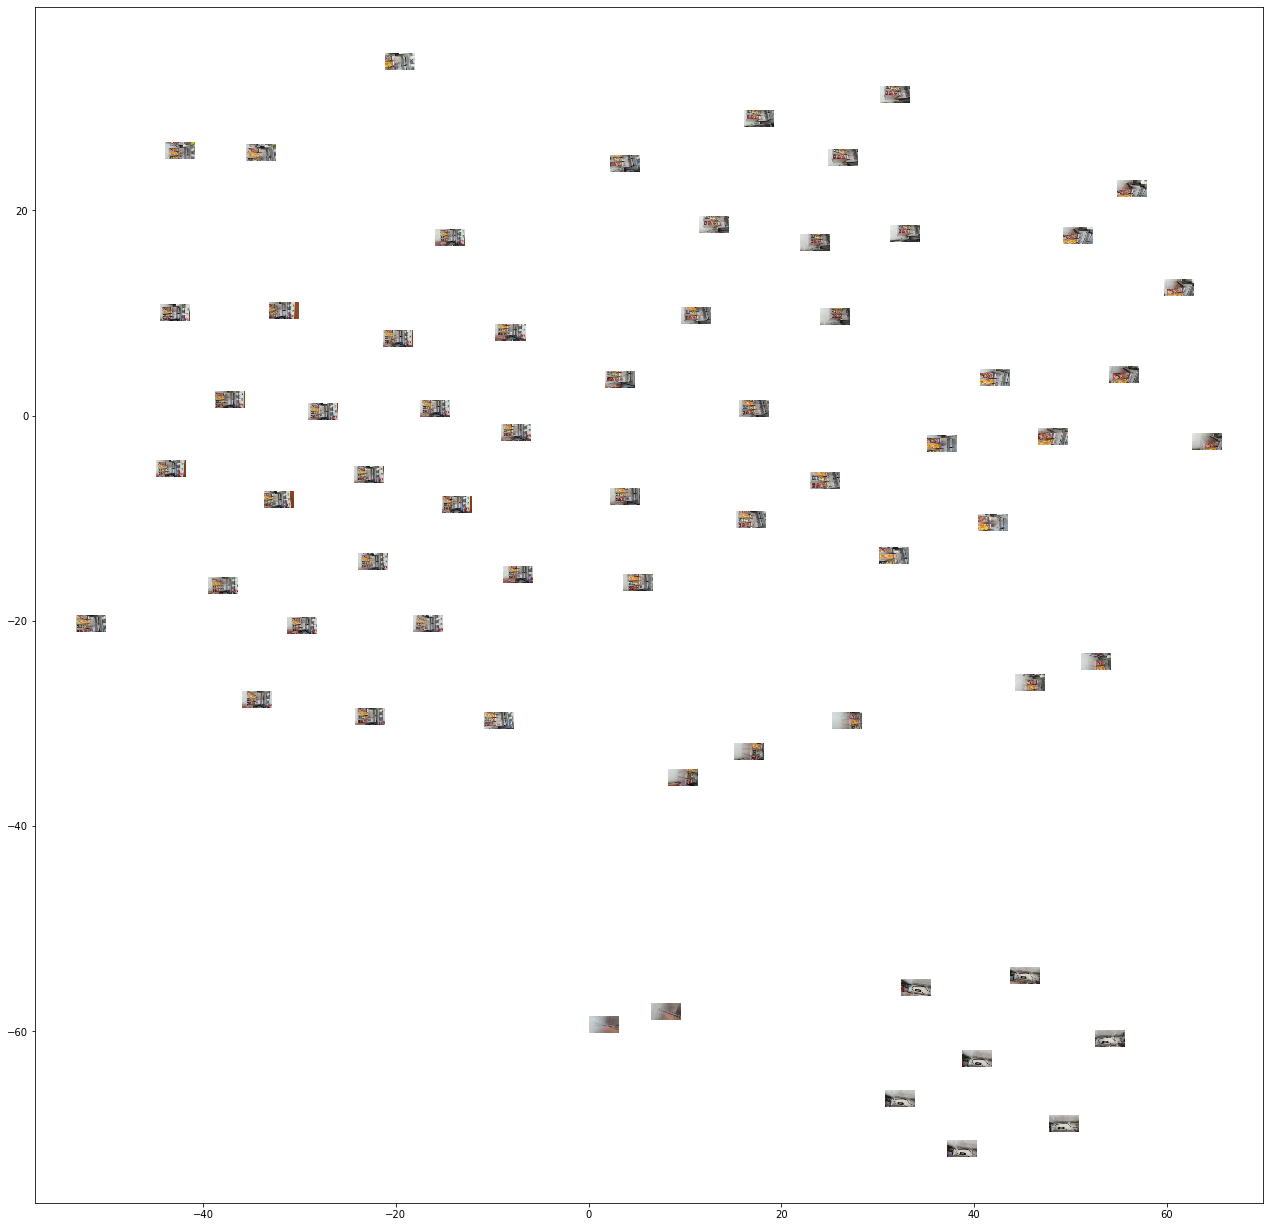

In [139]:
show_tsne(tsne_results[:, 0], tsne_results[:, 1], selected_filenames)

In [148]:
def tsne_to_grid_plotter_manual(x, y, selected_filenames):
    S = 2000
    s = 100
    x = (x - min(x)) / (max(x) - min(x))
    y = (y - min(y)) / (max(y) - min(y))
    x_values = []
    y_values = []
    filename_plot = []
    x_y_dict = {}
    for i, image_path in enumerate(selected_filenames):
        a = np.ceil(x[i] * (S - s))
        b = np.ceil(y[i] * (S - s))
        a = int(a - np.mod(a, s))
        b = int(b - np.mod(b, s))
        if str(a) + "|" + str(b) in x_y_dict:
            continue
        x_y_dict[str(a) + "|" + str(b)] = 1
        x_values.append(a)
        y_values.append(b)
        filename_plot.append(image_path)
    fig, axis = plt.subplots()
    fig.set_size_inches(22, 22, forward=True)
    plot_images_in_2d(x_values, y_values, filename_plot, zoom=.58, axis=axis)
    plt.show()

In [149]:
tsne_to_grid_plotter_manual(tsne_results[:, 0], tsne_results[:, 1],
                            selected_filenames)


IndexError: index 64 is out of bounds for axis 0 with size 64

In [129]:
num_feature_dimensions = 63
pca = PCA(n_components=num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)

In [130]:
neighbors = NearestNeighbors(n_neighbors=5,
                             algorithm='brute',
                             metric='euclidean').fit(feature_list_compressed)
distances, indices = neighbors.kneighbors([feature_list_compressed[0]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor rele

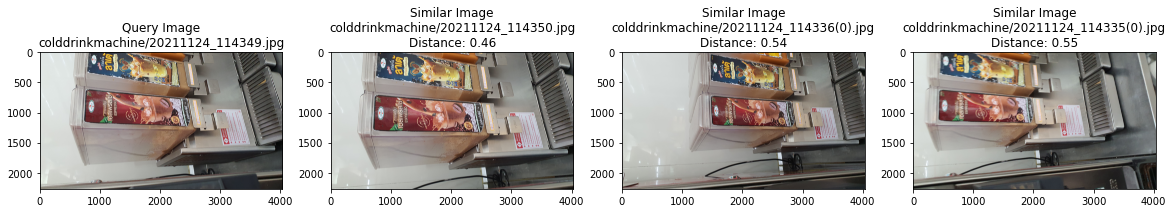

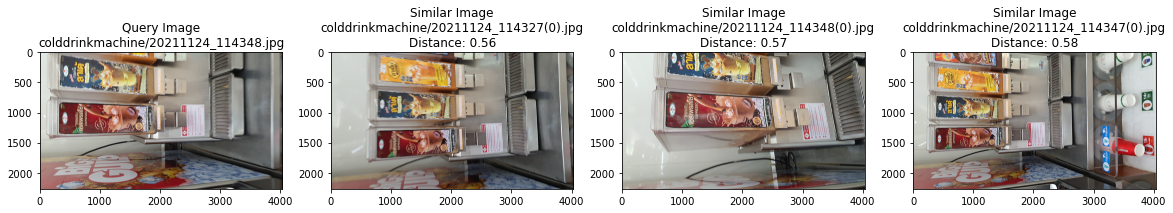

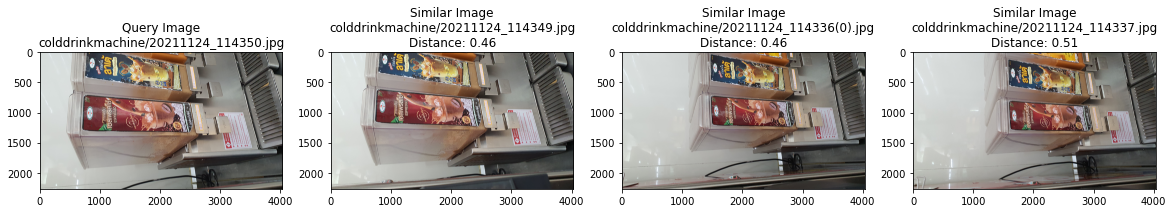

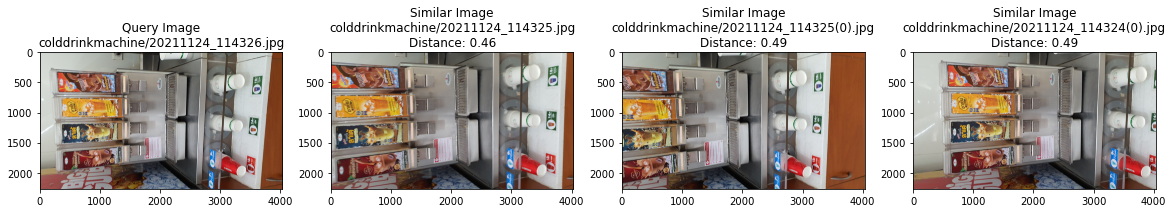

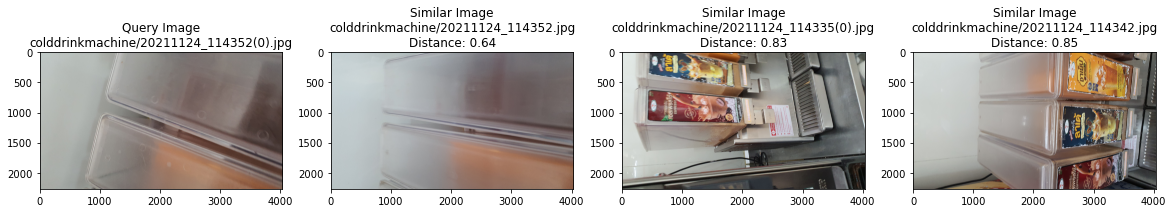

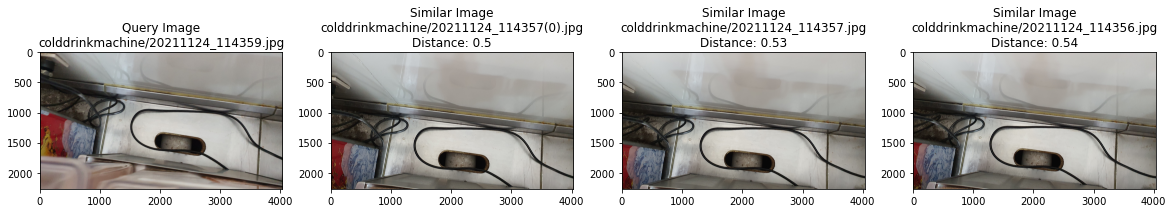

In [133]:
for i in range(6):
    random_image_index = random.randint(0,63)
    distances, indices = neighbors.kneighbors(
        [feature_list_compressed[random_image_index]])
    # Don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] + \
        [filenames[indices[0][i]] for i in range(1, 4)]
    plot_images(similar_image_paths, distances[0])

In [134]:
selected_features = feature_list_compressed[:4000]
selected_class_ids = class_ids[:4000]
selected_filenames = filenames[:4000]

time_start = time.time()
tsne_results = TSNE(n_components=2, verbose=1,
                    metric='euclidean').fit_transform(selected_features)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

[t-SNE] Computing 63 nearest neighbors...
[t-SNE] Indexed 64 samples in 0.000s...
[t-SNE] Computed neighbors for 64 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 64 / 64
[t-SNE] Mean sigma: 0.272270
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.237564
[t-SNE] KL divergence after 1000 iterations: 0.256777
t-SNE done! Time elapsed: 0.30622196197509766 seconds


ValueError: 'c' argument has 240 elements, which is inconsistent with 'x' and 'y' with size 64.

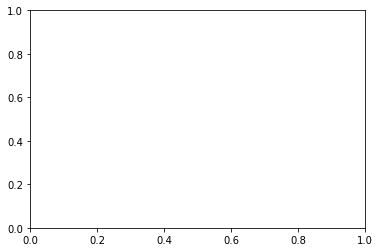

In [135]:
color_map = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:, 0],
                           tsne_results[:, 1],
                           c=selected_class_ids,
                           cmap=color_map)
plt.colorbar(scatter_plot)
plt.show()